# Shadowverse Exploration
<img src="https://upload.wikimedia.org/wikipedia/en/5/5e/Shadowverse.jpg"/>

Shadowverse is a digital card collecting game by [Cygame](https://www.cygames.co.jp/en/). If you've played Blizzard's game [Hearthstone](https://playhearthstone.com/en-us/), the rules are about the same. I personally played both but decided to just stick to Shadowverse for the art. Immediately you would notice the Japanese Anime style in the characters. Also, I liked how Cygame is open and consistent with their statistics monitoring which they use to adjust/nerf/buff cards based on usage and win rates. It keeps the game balanced in some ways. 

In this notebook, I will try to do some basic data manipulation techniques to find patterns that could hopefully aid in my deck building and practice analyzing data. 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

# Data Gathering
I referred to [theabhishek2511](https://gist.github.com/theabhishek2511/dfd54989013254324cc4d67f1dbc9f7f)'s post for value mapping and api. Much has changed since in-game since the post especially the addition of a new leader and clan, Portalcraft. Several new card packages were also released so I updated the list accordingly. 

In [11]:
cards = pd.read_csv("cards.csv", index_col=0)
cards.drop(["cv","tokens"],axis=1, inplace=True)
cards.head()

,atk,base_card_id,card_id,card_name,card_set_id,char_type,clan,copyright,cost,description,evo_atk,evo_description,evo_life,evo_skill_disc,foil_card_id,format_type,get_red_ether,is_foil,life,normal_card_id,org_evo_skill_disc,org_skill_disc,rarity,restricted_count,skill,skill_disc,skill_option,tribe_name,use_red_ether
0,1,900111020,900111020,Fairy Wisp,90000,1,1,NaN,0,"Gliding upon the wind, as if to illuminate the...",3,"Gliding upon the wind, gently floating as if w...",3,NaN,900111021,1,0,0,1,900111020,NaN,[b]Fanfare[/b][b]:[/b] Banish this follower if...,1,3,banish,Fanfare: Banish this follower if at least 2 ot...,none,-,0
1,0,110124010,110124010,Mark of the Unkilling,10010,4,1,NaN,0,"Burned by tears or torn by screams, you must b...",0,NaN,0,NaN,110124011,1,50,0,0,110124010,NaN,Banish an enemy follower with 0 attack or less...,2,3,"banish,pp_fixeduse,banish,draw",Banish an enemy follower with 0 attack or less...,"none,fixeduse=6,none,none",-,200
2,0,900144020,900144020,Blessings of Creation,90000,4,1,NaN,0,"The noble shimmer of life for you, noble one. ...",0,NaN,0,NaN,900144021,1,0,0,0,900144020,NaN,Draw 2 cards.<br>[b]Enhance[/b] [b](2)[/b][b]:...,4,3,"draw,pp_fixeduse,play_count_change",Draw 2 cards.<br>Enhance (2): Add 2 to the num...,"none,fixeduse=2,add_count=2",-,0
3,0,900144030,900144030,Wrath of Nature,90000,4,1,NaN,0,The noble shimmer of life must not be defiled ...,0,NaN,0,NaN,900144031,1,0,0,0,900144030,NaN,Give an allied follower +1/+0 and [b]Rush[/b]....,4,3,"powerup,rush,pp_fixeduse,quick",Give an allied follower +1/+0 and Rush.<br>Enh...,"add_offense=1,none,fixeduse=4,none",-,0
4,2,900231030,900231030,"Evyn, Novice Agent",90000,1,2,NaN,0,"Countless traps and snares, and all eyes on th...",2,I can still turn this around! I just gotta sta...,4,Storm.<br>Evolve: Deal 2 damage to an enemy fo...,900231031,1,0,0,2,900231030,[b]Storm[/b][b].[/b]<br>[b]Evolve[/b][b]:[/b] ...,NaN,3,3,"none//quick,damage",NaN,"none//none,damage=2",Officer,0


You may have noticed that I removed the `cv` column. Since I gathered the English version of the data, values in `cv` are blank. It specifies Voice Actors, (_yes, the cards talk_),  which is only available in the Japanese version. 

Let's have a look at the info we got about the cards:

In [9]:
cards.describe(include="all")

,atk,base_card_id,card_id,card_name,card_set_id,char_type,clan,copyright,cost,description,evo_atk,evo_description,evo_life,evo_skill_disc,foil_card_id,format_type,get_red_ether,is_foil,life,normal_card_id,org_evo_skill_disc,org_skill_disc,rarity,restricted_count,skill,skill_disc,skill_option,tribe_name,use_red_ether
count,1840.000000,1.840000e+03,1.840000e+03,1840,1840.000000,1840.000000,1840.000000,7,1840.000000,1840,1840.000000,1326,1840.000000,787,1.840000e+03,1840.000000,1840.000000,1840.0,1840.000000,1.840000e+03,787,1731,1840.000000,1840.000000,1840,1731,1840,1840,1840.000000
unique,NaN,NaN,NaN,1789,NaN,NaN,NaN,1,NaN,1811,NaN,1298,NaN,481,NaN,NaN,NaN,NaN,NaN,NaN,486,1534,NaN,NaN,738,1528,988,7,NaN
top,NaN,NaN,NaN,Cerberus,NaN,NaN,NaN,©TYPE-MOON・ufotable・FSNPC,NaN,"From this day forth, our order will be known a...",NaN,"""Woof! Are you going to the surface?"" ""Woof! A...",NaN,(Same as the unevolved form.),NaN,NaN,NaN,NaN,NaN,NaN,(Same as the unevolved form.),[b]Ward[/b][b].[/b],NaN,NaN,damage,Ward.,none,-,NaN
freq,NaN,NaN,NaN,3,NaN,NaN,NaN,7,NaN,3,NaN,3,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,104,25,NaN,NaN,103,27,286,1604,NaN
mean,2.263043,2.142800e+08,2.320066e+08,NaN,22341.250543,1.707065,3.910326,NaN,3.984783,NaN,3.632609,NaN,3.925543,NaN,2.320066e+08,0.513587,179.989130,0.0,2.562500,2.320066e+08,NaN,NaN,2.200543,2.994565,NaN,NaN,NaN,NaN,605.081522
std,2.070099,2.734279e+08,2.850912e+08,NaN,28431.661038,1.197947,2.474251,NaN,2.274235,NaN,2.741703,NaN,2.938633,NaN,2.850912e+08,0.499951,318.029037,0.0,2.260473,2.850912e+08,NaN,NaN,1.100941,0.104144,NaN,NaN,NaN,NaN,1084.606059
min,0.000000,1.000110e+08,1.000110e+08,NaN,10000.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000110e+08,0.000000,0.000000,0.0,0.000000,1.000110e+08,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,0.000000,1.021310e+08,1.023210e+08,NaN,10002.000000,1.000000,2.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN,1.023210e+08,0.000000,10.000000,0.0,0.000000,1.023210e+08,NaN,NaN,1.000000,3.000000,NaN,NaN,NaN,NaN,50.000000
50%,2.000000,1.063225e+08,1.066210e+08,NaN,10006.000000,1.000000,4.000000,NaN,4.000000,NaN,4.000000,NaN,4.000000,NaN,1.066210e+08,1.000000,50.000000,0.0,2.000000,1.066210e+08,NaN,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,200.000000
75%,4.000000,1.102158e+08,1.105410e+08,NaN,10010.000000,2.000000,6.000000,NaN,5.000000,NaN,5.000000,NaN,6.000000,NaN,1.105410e+08,1.000000,250.000000,0.0,4.000000,1.105410e+08,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,800.000000


# Card Details
Based on [theabhishek2511](https://gist.github.com/theabhishek2511/dfd54989013254324cc4d67f1dbc9f7f)'s post and by inspecting the cards in-game, I came up with the possible descriptions of each column
* atk - `int`, attack points of cards, ranges 0-20
* base_card_id - `int`, unique id for cards with the same names
* card_id - `int`, may differ from base_card_id if there was an alternate art (literal id for each card)
* card_name - `string`, title of the card
* card\_set\_id - `int`, id of the release/set the card belongs to:
 * 10000 : "Basic",
 * 10001 : "Standard",
 * 10003 : "Rise of Bahamut",
 * 10004 : "Tempest of the Gods",
 * 10005 : "Wonderland Dreams",
 * 10006 : "Starforged Legends",
 * 10007 : "Chronogenesis",
 * 10008 : "Dawnbreak, Nightedge",
 * 10009 : "Brigade of the Sky",
 * 10010 : "Omen of the Ten",
 * 10011 : "Altersphere",
 * 90000 : "Match only"
* char_type - The four major types of cards in the game:
 * 1 : "Follower",
 * 2 : "Amulet",
 * 3 : "Countdown Amulet",
 * 4 : "Spell"
* clan - different _craft_ each belongs to
 * 0 : "Neutral",
 * 1 : "Forestcraft",
 * 2 : "Swordcraft",
 * 3 : "Runecraft",
 * 4 : "Dragoncraft",
 * 5 : "Shadowcraft",
 * 6 : "Bloodcraft",
 * 7 : "Havecraft",
 * 8 : "Portalcraft"
* copyright - `string`, Shadowverse sometimes do partnership for their art so this column indicates cards copyrighted to whom
* cost - `int`, cards consume _play points_ in-game, this indicates how much, ranges from 0 to 20 (although the max _play poin+_ achieved in-game is 10, there are effects that make cards 10+ to be used)
* description - `string`, text written in the card
* evo_atk - `int`, cards can evolve and most, but not all, of the cards increases aattack when evolved
* evo_description - `string`, text written, usually quote, for evolving cards
* evo_life - `int`, health points of evolved card
* evo_skill_disc - `string`, description if there are any skills acquired by evolving the card



In [10]:
l_char_type = {1 : "Follower",
               2 : "Amulet",
               3 : "Countdown Amulet",
               4 : "Spell"
              }

l_card_set = {10000 : "Basic",
              10001 : "Standard",
              10002 : "Darkness Evolved",
              10003 : "Rise of Bahamut",
              10004 : "Tempest of the Gods",
              10005 : "Wonderland Dreams",
              10006 : "Starforged Legends",
              10007 : "Chronogenesis",
              10008 : "Dawnbreak, Nightedge",
              10009 : "Brigade of the Sky",
              10010 : "Omen of the Ten",
              10011 : "Altersphere",
              90000 : "Match only"
             }

l_clan = {0 : "Neutral",
          1 : "Forestcraft",
          2 : "Swordcraft",
          3 : "Runecraft",
          4 : "Dragoncraft",
          5 : "Shadowcraft",
          6 : "Bloodcraft",
          7 : "Havecraft",
          8 : "Portalcraft"
         }

# Separate alternate art cards from base cards

In [12]:
alt_cards = cards[cards["base_card_id"] != cards["card_id"]]
base_cards = cards[cards["base_card_id"] == cards["card_id"]]

In [13]:
base_cards = base_cards.drop(["base_card_id","foil_card_id","normal_card_id"], axis=1)
base_cards = base_cards.replace({"card_set_id": l_card_set, "clan" : l_clan, "char_type" : l_char_type})
base_cards.head()

,atk,card_id,card_name,card_set_id,char_type,clan,copyright,cost,description,evo_atk,evo_description,evo_life,evo_skill_disc,format_type,get_red_ether,is_foil,life,org_evo_skill_disc,org_skill_disc,rarity,restricted_count,skill,skill_disc,skill_option,tribe_name,use_red_ether
0,1,900111020,Fairy Wisp,Match only,Follower,Forestcraft,NaN,0,"Gliding upon the wind, as if to illuminate the...",3,"Gliding upon the wind, gently floating as if w...",3,NaN,1,0,0,1,NaN,[b]Fanfare[/b][b]:[/b] Banish this follower if...,1,3,banish,Fanfare: Banish this follower if at least 2 ot...,none,-,0
1,0,110124010,Mark of the Unkilling,Omen of the Ten,Spell,Forestcraft,NaN,0,"Burned by tears or torn by screams, you must b...",0,NaN,0,NaN,1,50,0,0,NaN,Banish an enemy follower with 0 attack or less...,2,3,"banish,pp_fixeduse,banish,draw",Banish an enemy follower with 0 attack or less...,"none,fixeduse=6,none,none",-,200
2,0,900144020,Blessings of Creation,Match only,Spell,Forestcraft,NaN,0,"The noble shimmer of life for you, noble one. ...",0,NaN,0,NaN,1,0,0,0,NaN,Draw 2 cards.<br>[b]Enhance[/b] [b](2)[/b][b]:...,4,3,"draw,pp_fixeduse,play_count_change",Draw 2 cards.<br>Enhance (2): Add 2 to the num...,"none,fixeduse=2,add_count=2",-,0
3,0,900144030,Wrath of Nature,Match only,Spell,Forestcraft,NaN,0,The noble shimmer of life must not be defiled ...,0,NaN,0,NaN,1,0,0,0,NaN,Give an allied follower +1/+0 and [b]Rush[/b]....,4,3,"powerup,rush,pp_fixeduse,quick",Give an allied follower +1/+0 and Rush.<br>Enh...,"add_offense=1,none,fixeduse=4,none",-,0
4,2,900231030,"Evyn, Novice Agent",Match only,Follower,Swordcraft,NaN,0,"Countless traps and snares, and all eyes on th...",2,I can still turn this around! I just gotta sta...,4,Storm.<br>Evolve: Deal 2 damage to an enemy fo...,1,0,0,2,[b]Storm[/b][b].[/b]<br>[b]Evolve[/b][b]:[/b] ...,NaN,3,3,"none//quick,damage",NaN,"none//none,damage=2",Officer,0


# Attack, Hit points and classes

C:\Users\Kevin.Rotairo\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\Kevin.Rotairo\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


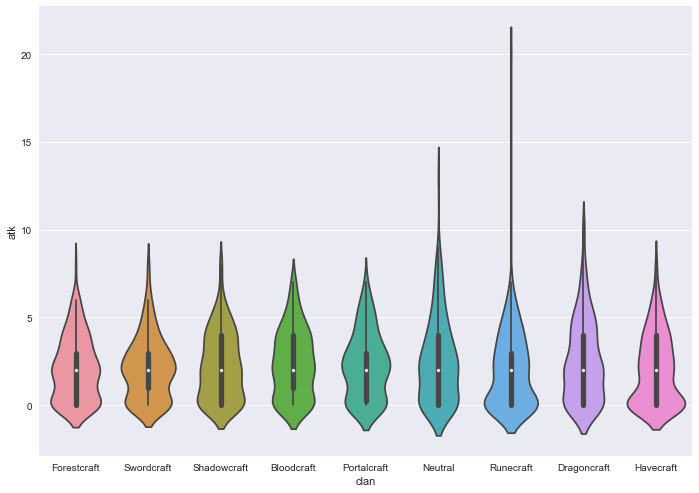

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="clan", y="atk", data=base_cards)

C:\Users\Kevin.Rotairo\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


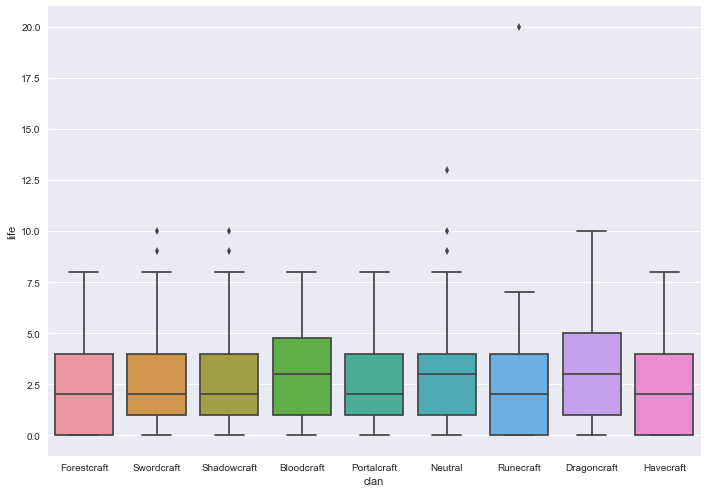

In [22]:
ax = sns.boxplot(x="clan", y="life", data=base_cards)

C:\Users\Kevin.Rotairo\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


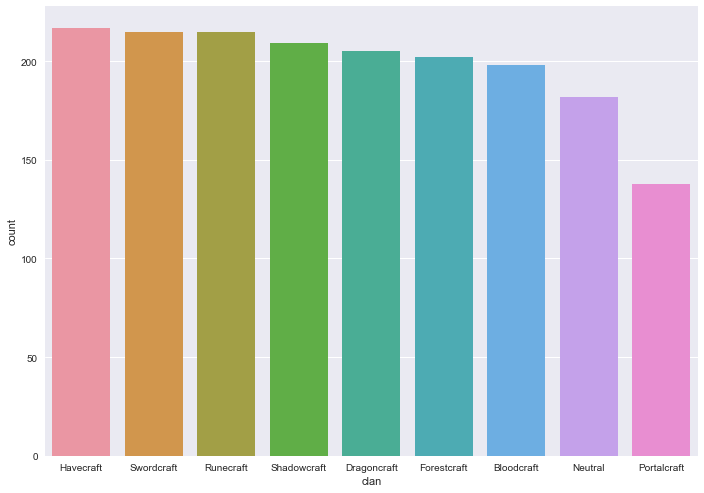

In [27]:
ax = sns.countplot(x="clan", data=base_cards, order = base_cards['clan'].value_counts().index)

# Count Legendary cards per clan

C:\Users\Kevin.Rotairo\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


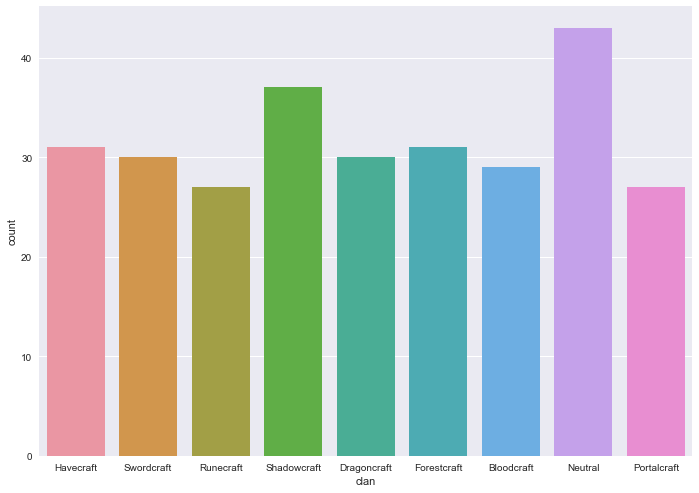

In [43]:
ax = sns.countplot(x="clan", data=base_cards[base_cards["rarity"] == 4], order = base_cards['clan'].value_counts().index)

C:\Users\Kevin.Rotairo\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


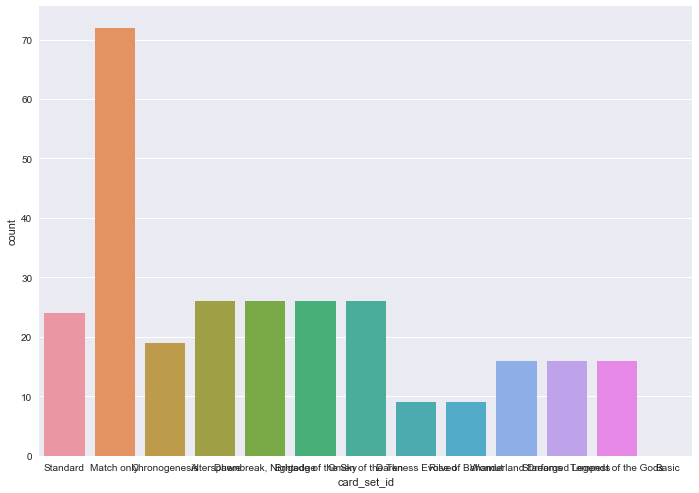

In [45]:
ax = sns.countplot(x="card_set_id", data=base_cards[base_cards["rarity"] == 4], order = base_cards['card_set_id'].value_counts().index)

In [11]:
base_cards[["unevolved_skill","evolved_skill"]] = pd.DataFrame(base_cards.skill.str.split('//',1).tolist())
base_cards["unevolved_skill"].replace(np.nan, '', regex=True, inplace=True)
base_cards_unevolved = pd.concat([base_cards, base_cards['unevolved_skill'].str.get_dummies(sep=',', )], axis=1)